In [1]:
import duckdb
import matplotlib.pyplot as plt
import os
import pandas as pd

from constants import PARQUETS

## Set-up

### Data

In [2]:
sorted(PARQUETS)

['/Users/raphaellaude/Documents/Projects/dxd/processed_data/unioned/mappluto_02b.parquet',
 '/Users/raphaellaude/Documents/Projects/dxd/processed_data/unioned/mappluto_03c.parquet',
 '/Users/raphaellaude/Documents/Projects/dxd/processed_data/unioned/mappluto_04c.parquet',
 '/Users/raphaellaude/Documents/Projects/dxd/processed_data/unioned/mappluto_05d.parquet',
 '/Users/raphaellaude/Documents/Projects/dxd/processed_data/unioned/mappluto_06c.parquet',
 '/Users/raphaellaude/Documents/Projects/dxd/processed_data/unioned/mappluto_07c.parquet',
 '/Users/raphaellaude/Documents/Projects/dxd/processed_data/unioned/mappluto_08b.parquet',
 '/Users/raphaellaude/Documents/Projects/dxd/processed_data/unioned/mappluto_09v2.parquet',
 '/Users/raphaellaude/Documents/Projects/dxd/processed_data/unioned/mappluto_10v2.parquet',
 '/Users/raphaellaude/Documents/Projects/dxd/processed_data/unioned/mappluto_11v2.parquet',
 '/Users/raphaellaude/Documents/Projects/dxd/processed_data/unioned/mappluto_12v2.parqu

In [3]:
len(PARQUETS)

22

In [4]:
con = duckdb.connect(database=':memory:')

### Helpers

In [5]:
def decorate(xlabel: str, ylabel: str) -> None:
    """
    Decorate plot, adding x and y labels.
    Removes box and sets location of legend off-plot.
    """
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='center left', bbox_to_anchor=(1, .5), frameon=False)
    plt.box(None)

## Column availability across years

In [6]:
dfs = []

for layer in PARQUETS:
    filename, _ = os.path.splitext(os.path.basename(layer))
    result = con.execute(f"select distinct lower(name) as name from parquet_schema('{layer}')").fetchdf()
    result.set_index('name', inplace=True)
    result[filename] = 1
    dfs.append(result)

col_availibility = pd.concat(dfs, axis=1)
col_availibility.fillna(0, inplace=True)
col_availibility = col_availibility[sorted(col_availibility.columns)]

col_availibility

,mappluto_02b,mappluto_03c,mappluto_04c,mappluto_05d,mappluto_06c,mappluto_07c,mappluto_08b,mappluto_09v2,mappluto_10v2,mappluto_11v2,...,mappluto_14v2,mappluto_15v1,mappluto_16v2,mappluto_17v1_1,nyc_mappluto_18v2_1_arc_shp,nyc_mappluto_19v2_arc_shp,nyc_mappluto_20v8_arc_shp,nyc_mappluto_21v3_arc_shp,nyc_mappluto_22v2_arc_shp,nyc_mappluto_23v2_arc_shp
name,,,,,,,,,,,,,,,,,,,,,
address,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
overlay2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
easements,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
bldgdepth,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
exempttot,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
floorarea,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
exempttotl,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ccdist,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
col_availibility.loc['zonedist1']

mappluto_02b                   1.0
mappluto_03c                   1.0
mappluto_04c                   1.0
mappluto_05d                   1.0
mappluto_06c                   1.0
mappluto_07c                   1.0
mappluto_08b                   1.0
mappluto_09v2                  1.0
mappluto_10v2                  1.0
mappluto_11v2                  1.0
mappluto_12v2                  1.0
mappluto_13v2                  1.0
mappluto_14v2                  1.0
mappluto_15v1                  1.0
mappluto_16v2                  1.0
mappluto_17v1_1                1.0
nyc_mappluto_18v2_1_arc_shp    1.0
nyc_mappluto_19v2_arc_shp      1.0
nyc_mappluto_20v8_arc_shp      1.0
nyc_mappluto_21v3_arc_shp      1.0
nyc_mappluto_22v2_arc_shp      1.0
nyc_mappluto_23v2_arc_shp      1.0
Name: zonedist1, dtype: float64

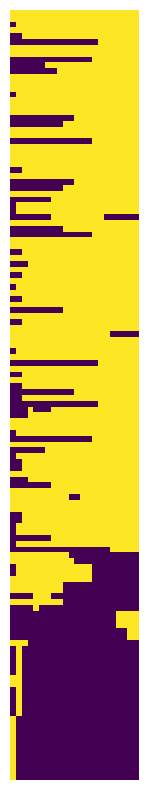

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(col_availibility.values, cmap='viridis', interpolation='nearest')
plt.box(None)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('column_availability.png')
plt.show();

In [9]:
col_availibility.index[col_availibility.eq(1).all(axis=1)].sort_values()

Index(['address', 'areasource', 'assessland', 'bldgclass', 'bldgdepth',
       'bldgfront', 'block', 'borocode', 'borough', 'comarea', 'firecomp',
       'geometry', 'histdist', 'irrlotcode', 'landmark', 'lot', 'lotarea',
       'lotdepth', 'lotfront', 'numbldgs', 'numfloors', 'overlay1', 'overlay2',
       'ownername', 'ownertype', 'policeprct', 'resarea', 'schema',
       'schooldist', 'spdist1', 'spdist2', 'splitzone', 'unitsres',
       'unitstotal', 'xcoord', 'ycoord', 'yearalter2', 'yearbuilt', 'zipcode',
       'zonedist1', 'zonedist2'],
      dtype='object', name='name')

## ZoneDist1

In [10]:
duckdb.query(f"select zonedist1, count(*) from '{sorted(PARQUETS)[0]}' group by zonedist1")

┌───────────┬──────────────┐
│ zoneDist1 │ count_star() │
│  varchar  │    int64     │
├───────────┼──────────────┤
│ M1-2      │         4032 │
│ M3-1      │         3167 │
│ R5        │       135044 │
│ R6A       │         2222 │
│ R7A       │         1029 │
│ R6B       │         9484 │
│ R7-3      │            1 │
│ C4-3A     │          228 │
│ C5-4      │           90 │
│ C1-7A     │           54 │
│  ·        │            · │
│  ·        │            · │
│  ·        │            · │
│ R7B       │         1311 │
│ R8X       │          124 │
│ C6-4      │          610 │
│ C4-5X     │           14 │
│ C5-5      │          308 │
│ C6-1G     │          381 │
│ C2-8      │          401 │
│ C1-6A     │          285 │
│ C1-6      │          459 │
│ C5-2      │          415 │
├───────────┴──────────────┤
│   140 rows (20 shown)    │
└──────────────────────────┘

In [11]:
dfs = []

for layer in PARQUETS:
    filename, _ = os.path.splitext(os.path.basename(layer))
    result = con.execute(f"""
        select
            split_part(zonedist1, '-', 1) AS split_part,
            count(*) as {filename}
        from
            '{layer}'
        group by
            split_part""").fetchdf()
    result.set_index('split_part', inplace=True)
    dfs.append(result)

zonedist1 = pd.concat(dfs, axis=1)
zonedist1 = zonedist1[sorted(zonedist1.columns)]

zonedist1

,mappluto_02b,mappluto_03c,mappluto_04c,mappluto_05d,mappluto_06c,mappluto_07c,mappluto_08b,mappluto_09v2,mappluto_10v2,mappluto_11v2,...,mappluto_14v2,mappluto_15v1,mappluto_16v2,mappluto_17v1_1,nyc_mappluto_18v2_1_arc_shp,nyc_mappluto_19v2_arc_shp,nyc_mappluto_20v8_arc_shp,nyc_mappluto_21v3_arc_shp,nyc_mappluto_22v2_arc_shp,nyc_mappluto_23v2_arc_shp
split_part,,,,,,,,,,,,,,,,,,,,,
M3,3374.0,3333.0,3336.0,3100.0,3045.0,3046.0,2909.0,2719.0,2654.0,2639.0,...,2593.0,2596.0,2599.0,2600.0,2601.0,2598.0,2617.0,2604.0,2581.0,2585.0
R3X,8540.0,8565.0,30505.0,35024.0,36365.0,39064.0,40348.0,42612.0,46460.0,46932.0,...,50225.0,50260.0,50302.0,50345.0,50655.0,50953.0,51033.0,52122.0,52142.0,52196.0
PARK,2002.0,1965.0,1962.0,1970.0,1936.0,1929.0,2017.0,2019.0,3716.0,3716.0,...,3708.0,3710.0,3708.0,3697.0,2945.0,2580.0,2638.0,2575.0,2576.0,2564.0
C7,112.0,113.0,114.0,114.0,114.0,114.0,113.0,75.0,72.0,72.0,...,72.0,72.0,72.0,72.0,73.0,73.0,74.0,74.0,74.0,74.0
R2A,NaN,NaN,NaN,9311.0,16791.0,18560.0,20631.0,24262.0,30099.0,30097.0,...,38011.0,38012.0,38012.0,38012.0,37996.0,37994.0,38000.0,38003.0,38013.0,38014.0
PARKNYS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.0,189.0,...,189.0,189.0,189.0,189.0,NaN,NaN,NaN,NaN,NaN,NaN
R9A,55.0,55.0,55.0,55.0,55.0,127.0,124.0,123.0,126.0,126.0,...,123.0,123.0,123.0,320.0,367.0,368.0,356.0,364.0,362.0,362.0
ZNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
C8,5540.0,5420.0,5347.0,5169.0,5024.0,4834.0,4728.0,4670.0,4450.0,4270.0,...,3954.0,3954.0,3562.0,3528.0,3295.0,3269.0,3267.0,3246.0,3222.0,3218.0


In [12]:
dfs = []

for idx, layer in enumerate(PARQUETS):
    filename, _ = os.path.splitext(os.path.basename(layer))
    result = con.execute(f"""
        select
            substring(zonedist1 from 1 for 1) AS split_part,
            count(*) as '{idx + 2002}'
        from
            '{layer}'
        group by
            split_part""").fetchdf()
    result.set_index('split_part', inplace=True)
    dfs.append(result)

zonedist1 = pd.concat(dfs, axis=1)
zonedist1 = zonedist1[sorted(zonedist1.columns)]

zonedist1

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
split_part,,,,,,,,,,,,,,,,,,,,,
C,25540.0,25079.0,26393.0,25888.0,26277.0,26324.0,25071.0,25825.0,26687.0,25222.0,...,25028.0,25284.0,26088.0,25186.0,25701.0,26228.0,26046.0,25779.0,26014.0,25819.0
None,391.0,702.0,1389.0,1725.0,2146.0,1551.0,15.0,1880.0,1281.0,559.0,...,13.0,13.0,1288.0,13.0,1546.0,1036.0,2438.0,413.0,1749.0,459.0
Z,30.0,NaN,29.0,NaN,NaN,NaN,NaN,NaN,29.0,NaN,...,NaN,NaN,NaN,NaN,NaN,30.0,NaN,30.0,NaN,30.0
M,30139.0,30115.0,31279.0,33196.0,32477.0,33607.0,30023.0,32010.0,31467.0,30245.0,...,30000.0,29861.0,34149.0,29704.0,34730.0,31075.0,32311.0,30671.0,34975.0,30708.0
R,797193.0,798779.0,795879.0,789130.0,792048.0,790340.0,799421.0,797184.0,795681.0,798360.0,...,799570.0,799242.0,785053.0,799313.0,782410.0,795592.0,793743.0,796570.0,782842.0,796504.0
B,43.0,43.0,41.0,41.0,40.0,41.0,43.0,43.0,43.0,43.0,...,43.0,43.0,37.0,43.0,36.0,43.0,40.0,43.0,36.0,43.0
P,3935.0,2580.0,3958.0,2109.0,2102.0,2143.0,2638.0,2192.0,3958.0,2945.0,...,2575.0,2576.0,2137.0,2564.0,2140.0,3960.0,2190.0,3952.0,2177.0,3950.0
N,NaN,NaN,NaN,893.0,9.0,852.0,NaN,NaN,NaN,NaN,...,NaN,NaN,578.0,NaN,590.0,NaN,19.0,NaN,545.0,NaN


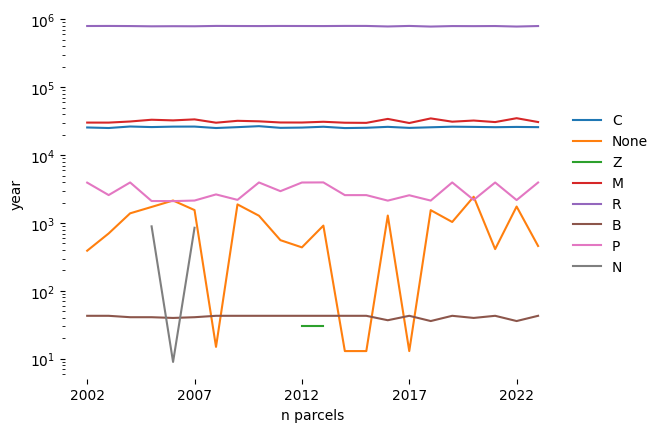

In [13]:
zonedist1.T.plot()
plt.yscale('log')
decorate('n parcels', 'year')

## Building Codes

In [14]:
dfs = []

for layer in PARQUETS:
    filename, _ = os.path.splitext(os.path.basename(layer))
    result = con.execute(f"""
        select
            bldgclass as bldgclass,
            count(*) as {filename}
        from
            '{layer}'
        group by
            bldgclass""").fetchdf()
    result.set_index('bldgclass', inplace=True)
    dfs.append(result)

bldgclass = pd.concat(dfs, axis=1)
bldgclass = bldgclass[sorted(bldgclass.columns)]

bldgclass

,mappluto_02b,mappluto_03c,mappluto_04c,mappluto_05d,mappluto_06c,mappluto_07c,mappluto_08b,mappluto_09v2,mappluto_10v2,mappluto_11v2,...,mappluto_14v2,mappluto_15v1,mappluto_16v2,mappluto_17v1_1,nyc_mappluto_18v2_1_arc_shp,nyc_mappluto_19v2_arc_shp,nyc_mappluto_20v8_arc_shp,nyc_mappluto_21v3_arc_shp,nyc_mappluto_22v2_arc_shp,nyc_mappluto_23v2_arc_shp
bldgclass,,,,,,,,,,,,,,,,,,,,,
C7,7206.0,7227.0,7241.0,7379.0,7422.0,7471.0,7461.0,7485.0,7521.0,7517.0,...,7601.0,7575.0,7590.0,7603.0,7754.0,7756.0,7781.0,7784.0,7791.0,7812.0
B9,24655.0,24594.0,25107.0,25680.0,25660.0,25829.0,25884.0,26091.0,26088.0,26093.0,...,26004.0,25972.0,25962.0,25844.0,25721.0,25650.0,25660.0,26023.0,25959.0,25900.0
D9,945.0,919.0,945.0,948.0,950.0,1022.0,984.0,1007.0,1037.0,988.0,...,1042.0,1015.0,1003.0,594.0,557.0,561.0,565.0,563.0,562.0,555.0
U9,272.0,273.0,273.0,278.0,272.0,274.0,274.0,273.0,271.0,271.0,...,266.0,265.0,265.0,265.0,271.0,278.0,278.0,279.0,278.0,278.0
S4,2599.0,2591.0,2588.0,2487.0,2504.0,2520.0,2526.0,2540.0,2555.0,2552.0,...,2563.0,2573.0,2581.0,2582.0,2576.0,2589.0,2584.0,2580.0,2583.0,2583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z6,181.0,116.0,116.0,178.0,125.0,125.0,125.0,133.0,125.0,126.0,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E4,177.0,175.0,168.0,171.0,162.0,179.0,178.0,179.0,176.0,182.0,...,187.0,188.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E3,1224.0,1189.0,1260.0,1285.0,1295.0,1269.0,1281.0,1302.0,1289.0,1278.0,...,1295.0,1292.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Harmonize column names

In [15]:
from thefuzz import fuzz
from itertools import combinations

In [16]:
consistent_cols = col_availibility.index[col_availibility.eq(1).all(axis=1)].sort_values()

In [17]:
print(f"{len(consistent_cols)} of {len(col_availibility)} {(len(consistent_cols) / len(col_availibility)) * 100:.1f}%")

41 of 132 31.1%


In [18]:
partial_cols = col_availibility.index[~col_availibility.index.isin(consistent_cols)]

partial_cols

Index(['easements', 'exempttot', 'pfirm15_fl', 'sanitsub', 'zonedist4',
       'ltdheight', 'bldgarea', 'residfar', 'ct2010', 'spdist3', 'assesstot',
       'commfar', 'tract2010', 'zmcode', 'sanborn', 'taxmap', 'mappluto_f',
       'cb2010', 'sanitboro', 'retailarea', 'bbl', 'version', 'cd',
       'garagearea', 'ext', 'lottype', 'exemptland', 'zonemap', 'healthcent',
       'officearea', 'builtfar', 'facilfar', 'edesignum', 'firm07_fla',
       'shape_leng', 'shape_area', 'council', 'sanitdistr', 'zonedist3',
       'landuse', 'factryarea', 'bsmtcode', 'condono', 'appbbl', 'healtharea',
       'strgearea', 'otherarea', 'proxcode', 'yearalter1', 'appdate',
       'plutomapid', 'dcpedited', 'healthctr', 'maxallwfar', 'allzoning1',
       'allzoning2', 'builtcode', 'cb2000', 'ct2000', 'shape_len', 'tract2000',
       'instregion', 'latitude', 'longitude', 'notes', 'bctcb2020', 'bct2020',
       'tbl', 'majprpdate', 'landmkdate', 'zoningdate', 'basempdate',
       'masdate', 'far', 'corn

In [19]:
combos = pd.DataFrame([(a, b, fuzz.ratio(a, b)) for a, b in combinations(partial_cols, 2)], columns=["col1", "col2", "similarity"])

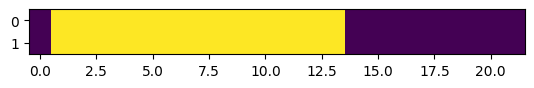

In [20]:
plt.imshow(col_availibility.loc[['allzoning1', 'allzoning2']].values)

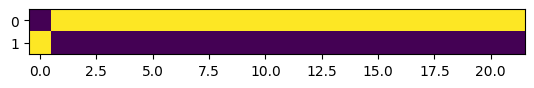

In [21]:
plt.imshow(col_availibility.loc[['landuse', 'landuse2']].values)

In [22]:
combos['not_overlapping'] = [col_availibility.loc[cols].sum().le(1).all() for cols in combos[['col1', 'col2']].values]

In [23]:
combos['not_overlapping'].value_counts()

not_overlapping
False    2554
True     1541
Name: count, dtype: int64

(-0.5, 1.5)

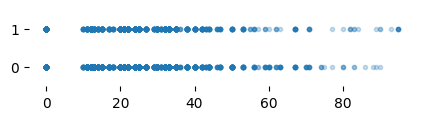

In [24]:
plt.figure(figsize=(5, 1))
plt.scatter(x=combos['similarity'], y=combos['not_overlapping'], alpha=0.25, marker='.')
plt.box(None)
plt.ylim(-.5, 1.5)

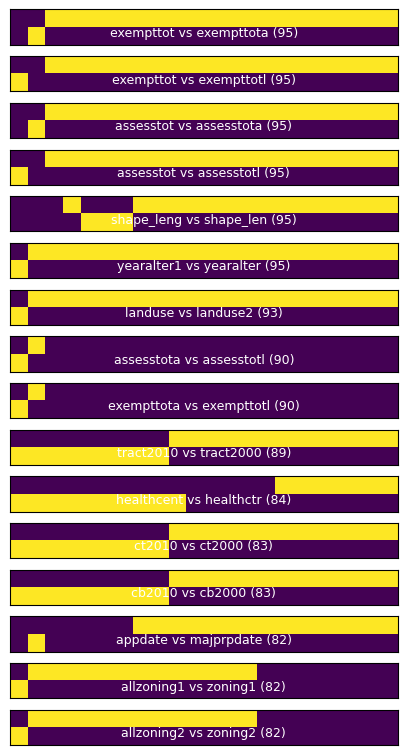

In [25]:
threshold = 70

f = combos['similarity'].gt(80) & combos['not_overlapping']
n = f.sum()

fig, axes = plt.subplots(figsize=(5, n * .6), nrows=n)

for idx, _, col1, col2, similarity, _ in combos[f].sort_values('similarity', ascending=False).reset_index().itertuples(index=True):
    axes[idx].imshow(col_availibility.loc[[col1, col2]].values)
    axes[idx].set_title(f"{col1} vs {col2} ({similarity})", y=0, fontdict={'fontsize': 9, 'color': '#fff'})
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

In [26]:
match_df = combos[f].sort_values('similarity', ascending=False).reset_index(drop=True).copy()

matches = [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1]
match_df['matches'] = matches

match_df

,col1,col2,similarity,not_overlapping,matches
0,exempttot,exempttota,95,True,1
1,exempttot,exempttotl,95,True,1
2,assesstot,assesstota,95,True,1
3,assesstot,assesstotl,95,True,1
4,shape_leng,shape_len,95,True,1
5,yearalter1,yearalter,95,True,1
6,landuse,landuse2,93,True,1
7,assesstota,assesstotl,90,True,1
8,exempttota,exempttotl,90,True,1
9,tract2010,tract2000,89,True,0
